In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ARTIFACT_DIR = "../artifact"

In [3]:
os.getcwd()

'/home/jmhwang/Documents/github/jmhwang-dev/e-commerce/eda'

In [4]:

file_name = "all_portuguess.txt"
all_portuguess_txt = os.path.join(ARTIFACT_DIR, 'preprocess', file_name)

translated = {}
translated[file_name] = []
with open(all_portuguess_txt, 'r') as f:
    for line in f.readlines():
        translated[file_name].append(line.strip())

for file_name in ['trans-p2e.txt', "trans-e2k.txt"]:
    p2e_txt_path = os.path.join(ARTIFACT_DIR, 'inference', file_name)
    translated[file_name] = []
    with open(p2e_txt_path, 'r') as f:
        for line in f.readlines():
            translated[file_name].append(line.strip())

df = pd.DataFrame(translated)
df.head()

,all_portuguess.txt,trans-p2e.txt,trans-e2k.txt
0,"""não recebi o produto, o produto consta como e...","“I did not receive the product, the product is...",“제품을 받지 못했습니다. 제품은 리베이랑 프레투에 있는 우체국으로 보내졌다고 되어...
1,"""adquiri 2 mochilas pelo site lannister de e p...","""I bought 2 backpacks from the lannister site ...","""저는 랜니스터 사이트와 다른 파트너로부터 두 개의 배낭을 구매했습니다. 배달 예정..."
2,"""comprei o produto confiando nas lojas lannist...","""I bought the product trusting the lannister s...","""저는 랜니스터 상점을 믿고 제품을 구매했고, 타르가리온 상점은 제품을 적절한 시간..."
3,"""assim que fiz o pedido observei que tinha ped...","""as soon as I made the request I noticed that ...","""요청을 할 때 제가 잘못된 제품을 주문했다는 것을 알았고 즉시 주문 취소를 요청했..."
4,"""na minha compra realizada em 20/09/17 a loja ...","""in my purchase made on 09/20/17 the targaryen...","""09/20/17에 구매한 태그리언 스토어에서 제품을 구할 수 없었고 지금까지 태그..."


In [5]:
len_output = pd.DataFrame()
for col in df.columns:
    len_col_name = f'len_{col}'
    len_output[len_col_name] = df[col].str.len()

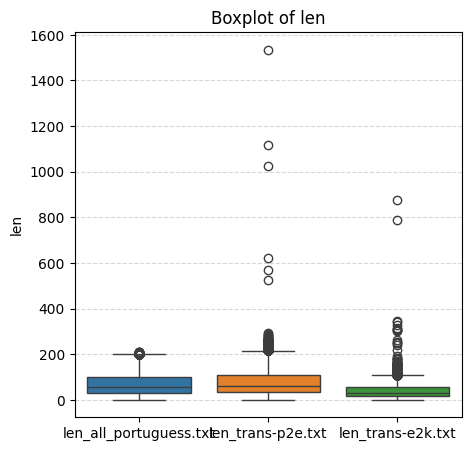

In [6]:
plt.figure(figsize=(5, 5))
sns.boxplot(len_output)  # 수치형 데이터 하나만 boxplot으로
plt.title(f'Boxplot of len')
plt.ylabel('len')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [7]:
outlier = len_output['len_trans-p2e.txt'] > 400
outlier_index = outlier[outlier].index
outlier_index

Index([336, 1449, 3828, 5014, 14457, 26485], dtype='int64')

In [8]:
from pprint import pprint
pprint(df.iloc[outlier_index].to_dict())

{'all_portuguess.txt': {336: 'bommmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm',
                        1449: '"comprei cartucho para impressora pg40 canon '
                              'mandaram cartucho compatível, no anuncio tem '
                              'até a embalagem da canon e posso estar enganada '
                              '(mas acho que não estou) o cartucho é '
                              'recarregado.?.?.?.?."',
                        3828: '"estou satisfeito com o produto, chegou bem '
                              'antes do prazo e um produto perfeito.estao de '
                              'parabéns. recomendo o site e o vendedor '
                              '👊?👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏"',
                        5014: 'mesmo que o prazo tenha sido indicado na hora '
                          

In [9]:
# for col in df.columns:
#     print(col)
#     print(df[col].iloc[outlier_index].values)
#     print()

## Outlier
### 원인
1. 전처리 미흡: 3건 (336, 1449, 3828)
2. 추론 결과 이상: 6건